In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from deep_translator import GoogleTranslator


D:\Jupyter\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# df = pd.read_csv("News_Tweets.csv", index_col=False)
df = pd.read_csv(r"C:\Users\user\Downloads\Data.csv")


In [3]:
df

,Tweets
0,#FarmersProtest2024
1,#FarmersProtest2024 old but funny.
2,#FarmersProtest2024 sarkar ka kehna hai ki kis...
3,#FarmersProtest2024
4,#FarmersProtest2024
...,...
94,"""ये सरकार अगर अटल-आडवाणी की होती तो हमारी बात ..."
95,"""अपने ट्रैक्टरों को भी मज़बूत रखना, हम एमएसपी ..."
96,राकेश टिकैत कह रहे हैं कि इस बार किसान ग़ाज़ीप...
97,इस बार 'ट्रैक्टर' से कैसे मिलेगी MSP? जानें Ne...


In [4]:
def langconv(txt):
    translated = GoogleTranslator(source='auto', target='english').translate(txt)
    return translated

In [5]:
df['txt'] = df["Tweets"].apply(lambda x : langconv(x))

In [6]:
df

,Tweets,txt
0,#FarmersProtest2024,#FarmersProtest2024
1,#FarmersProtest2024 old but funny.,#FarmersProtest2024 old but funny.
2,#FarmersProtest2024 sarkar ka kehna hai ki kis...,#FarmersProtest2024 The government says that t...
3,#FarmersProtest2024,#FarmersProtest2024
4,#FarmersProtest2024,#FarmersProtest2024
...,...,...
94,"""ये सरकार अगर अटल-आडवाणी की होती तो हमारी बात ...","""If this government was of Atal-Advani, it wou..."
95,"""अपने ट्रैक्टरों को भी मज़बूत रखना, हम एमएसपी ...","“Keep your tractors strong too, we will suppor..."
96,राकेश टिकैत कह रहे हैं कि इस बार किसान ग़ाज़ीप...,Rakesh Tikait is saying that this time farmers...
97,इस बार 'ट्रैक्टर' से कैसे मिलेगी MSP? जानें Ne...,How will you get MSP from 'tractor' this time?...


In [7]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [8]:
new_df = pd.DataFrame()
new_df["Tweets"] = df["txt"].apply(data_processing)


In [9]:
new_df

,Tweets
0,farmersprotest2024
1,farmersprotest2024 old funny
2,farmersprotest2024 government says farmers fee...
3,farmersprotest2024
4,farmersprotest2024
...,...
94,government ataladvani would listened us farmer...
95,keep tractors strong support msp farmer leader...
96,rakesh tikait saying time farmers come ghazipu...
97,get msp tractor time know bharatiya kisan unio...


In [10]:
new_df = new_df.drop_duplicates("Tweets")

In [11]:
new_df

,Tweets
0,farmersprotest2024
1,farmersprotest2024 old funny
2,farmersprotest2024 government says farmers fee...
6,farmersprotest2024 explain
7,farmersprotest2024 todays update
...,...
85,keep tractors strong support msp farmer leader...
86,rakesh tikait saying time farmers come ghazipu...
87,get msp tractor time know bharatiya kisan unio...
91,rakesh tikaits speech kisan bhawan platform si...


In [12]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [13]:
new_df["Tweets"] = new_df["Tweets"].apply(lambda x: stemming(x))

C:\Users\user\AppData\Local\Temp\ipykernel_5580\2317882576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Tweets"] = new_df["Tweets"].apply(lambda x: stemming(x))


In [14]:
new_df

,Tweets
0,farmersprotest2024
1,farmersprotest2024 old funny
2,farmersprotest2024 government says farmers fee...
6,farmersprotest2024 explain
7,farmersprotest2024 todays update
...,...
85,keep tractors strong support msp farmer leader...
86,rakesh tikait saying time farmers come ghazipu...
87,get msp tractor time know bharatiya kisan unio...
91,rakesh tikaits speech kisan bhawan platform si...


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 98
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  86 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [16]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [17]:
new_df["Polarity"] = new_df["Tweets"].apply(polarity)

C:\Users\user\AppData\Local\Temp\ipykernel_5580\4049045990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Polarity"] = new_df["Tweets"].apply(polarity)


In [18]:
new_df

,Tweets,Polarity
0,farmersprotest2024,0.000000
1,farmersprotest2024 old funny,0.175000
2,farmersprotest2024 government says farmers fee...,0.000000
6,farmersprotest2024 explain,0.000000
7,farmersprotest2024 todays update,0.000000
...,...,...
85,keep tractors strong support msp farmer leader...,0.433333
86,rakesh tikait saying time farmers come ghazipu...,0.000000
87,get msp tractor time know bharatiya kisan unio...,0.357143
91,rakesh tikaits speech kisan bhawan platform si...,0.121429


In [19]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [20]:
new_df["Sentiment"] = new_df["Polarity"].apply(sentiment)

C:\Users\user\AppData\Local\Temp\ipykernel_5580\3710302567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Sentiment"] = new_df["Polarity"].apply(sentiment)


In [21]:
new_df

,Tweets,Polarity,Sentiment
0,farmersprotest2024,0.000000,Neutral
1,farmersprotest2024 old funny,0.175000,Positive
2,farmersprotest2024 government says farmers fee...,0.000000,Neutral
6,farmersprotest2024 explain,0.000000,Neutral
7,farmersprotest2024 todays update,0.000000,Neutral
...,...,...,...
85,keep tractors strong support msp farmer leader...,0.433333,Positive
86,rakesh tikait saying time farmers come ghazipu...,0.000000,Neutral
87,get msp tractor time know bharatiya kisan unio...,0.357143,Positive
91,rakesh tikaits speech kisan bhawan platform si...,0.121429,Positive


In [34]:
new_df = new_df.dropna()

In [35]:
new_df.shape

(86, 3)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

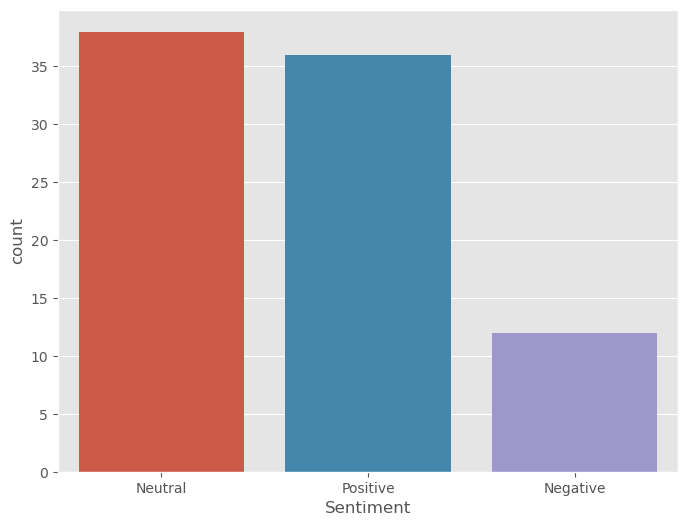

In [36]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data = new_df)

Text(0.5, 1.0, 'Distribution of sentiments')

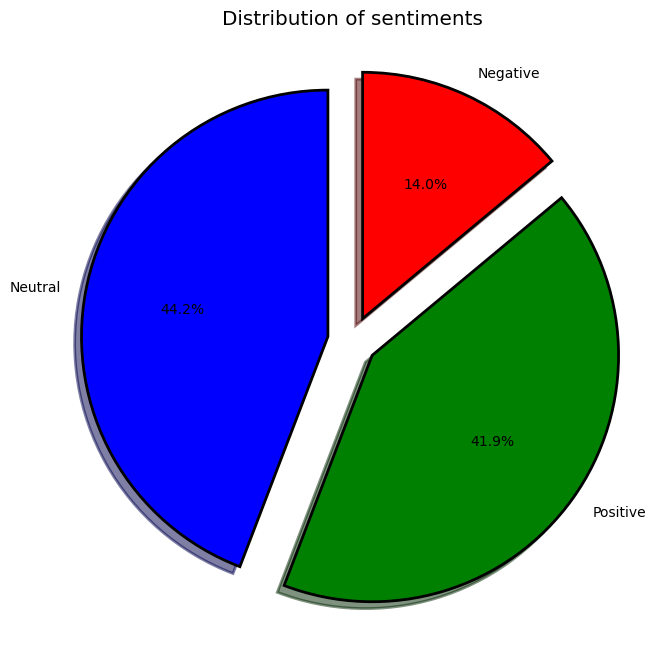

In [37]:
fig = plt.figure(figsize=(8,8))
colors = ("blue", "green", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = new_df['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [38]:
new_df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [39]:
pos_tweets = new_df[new_df['Sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(['Polarity'], ascending= False)
pos_tweets.head()

,Tweets,Polarity,Sentiment
53,dutch mp praised nupur sharma netherlands mp s...,0.9,Positive
68,dont let misinformation win make 2024 year fig...,0.8,Positive
20,shameless people disrespect way prime minister...,0.7,Positive
40,50yearold harpal kaur became example charkha e...,0.7,Positive
60,tributes chhatrapati shivaji maharaj jayanti v...,0.7,Positive


In [40]:
nut_tweets = new_df[new_df['Sentiment'] == 'Neutral']
nut_tweets = nut_tweets.sort_values(['Polarity'], ascending= False)
nut_tweets.head()

,Tweets,Polarity,Sentiment
0,farmersprotest2024,0.0,Neutral
75,liquor distributed farmers protest shorts dfra...,0.0,Neutral
48,former cm kai amarinder met pm discussed wider...,0.0,Neutral
61,governments handling protests use force politi...,0.0,Neutral
62,demands related msp criticism governments stan...,0.0,Neutral


In [41]:
neg_tweets = new_df[new_df['Sentiment'] == 'Negative']
neg_tweets = neg_tweets.sort_values(['Polarity'], ascending= False)
neg_tweets.head()

,Tweets,Polarity,Sentiment
29,pratapgarh today 37th day congress mp rahul ga...,-0.048611,Negative
56,pishuy goyal said government proposed cooperat...,-0.071429,Negative
15,terminating women officer ground marriage arbi...,-0.100000,Negative
54,fourth round meeting held agitating farmers go...,-0.100000,Negative
57,union minister piyush goyal said governments p...,-0.100000,Negative


In [42]:
vect = CountVectorizer(ngram_range=(1,2)).fit(new_df["Tweets"])

feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 2264

First 20 features:
 ['10' '10 headlines' '11' '11 february' '11 mins' '13' '13 months'
 '13 video' '15' '15 lakh' '19' '19 delhi' '19 feb' '20' '20 feb' '2006'
 '2006 congress' '2009' '2009 caste' '2010']


In [43]:
X = new_df["Tweets"]
Y = new_df['Sentiment']
X = vect.transform(X)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [45]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (68, 2264)
Size of y_train: (68,)
Size of x_test: (18, 2264)
Size of y_test: (18,)


In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 50.00%


In [48]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[0 4 0]
 [0 6 2]
 [0 3 3]]


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.46      0.75      0.57         8
    Positive       0.60      0.50      0.55         6

    accuracy                           0.50        18
   macro avg       0.35      0.42      0.37        18
weighted avg       0.41      0.50      0.44        18



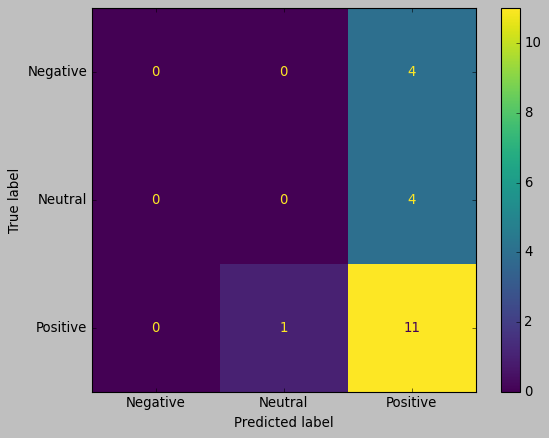

In [37]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()